# Association Rules Mining With Apriori Algorithm

## On Titanic Dataset

In [79]:
%matplotlib inline

## Imports

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Loading Dataset

In [94]:
titanic = pd.read_csv('/home/bhanuchander/course/Learn_MachineLearning/data/csv/titanic/train.csv')

nominal_cols = ['Embarked','Pclass','Age', 'Survived', 'Sex']

cat_cols = ['Embarked','Pclass','Age', 'Survived', 'Title']

titanic['Title'] = titanic.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

titanic['Title'].fillna('Title_UK', inplace=True)

titanic['Embarked'].fillna('Unknown',inplace=True)

titanic['Age'].fillna(0, inplace=True)

# Replacing Binary with String
rep = {0: "Dead", 1: "Survived"}

titanic.replace({'Survived' : rep}, inplace=True)


## Binning

In [95]:
## Binning Method to categorize the Continous Variables

def binning(col, cut_points, labels=None):

  minval = col.min()
  maxval = col.max()

  break_points = [minval] + cut_points + [maxval]


  if not labels:
    labels = range(len(cut_points)+1)


  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [96]:
cut_points = [1, 10, 20, 50 ]

labels = ["Unknown", "Child", "Teen", "Adult", "Old"]

titanic['Age'] = binning(titanic['Age'], cut_points, labels)

in_titanic = titanic[nominal_cols]

cat_titanic = titanic[cat_cols]

In [97]:
in_titanic.head()

,Embarked,Pclass,Age,Survived,Sex
0,S,3,Adult,Dead,male
1,C,1,Adult,Survived,female
2,S,3,Adult,Survived,female
3,S,1,Adult,Survived,female
4,S,3,Adult,Dead,male


In [98]:
cat_titanic.head()

,Embarked,Pclass,Age,Survived,Title
0,S,3,Adult,Dead,Mr.
1,C,1,Adult,Survived,Mrs.
2,S,3,Adult,Survived,Miss.
3,S,1,Adult,Survived,Mrs.
4,S,3,Adult,Dead,Mr.


# Dava Visualization with Plots

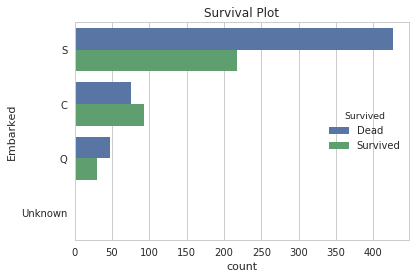

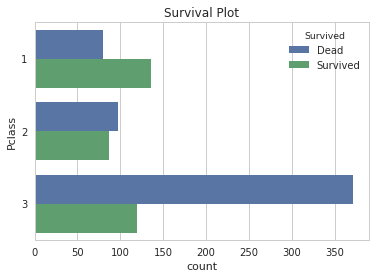

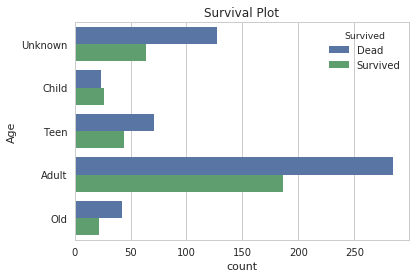

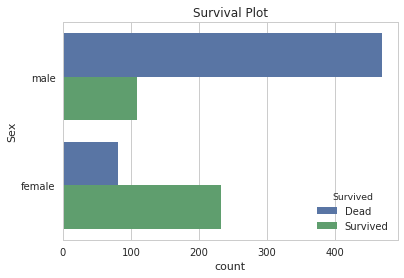

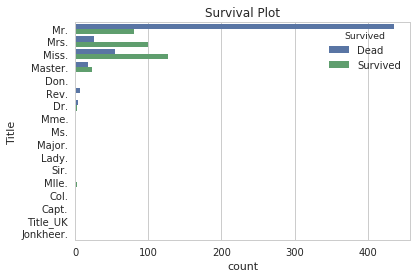

In [104]:
for x in ['Embarked', 'Pclass','Age', 'Sex', 'Title']:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="Survived", data=titanic)
    plt.ylabel(x)
    plt.title('Survival Plot')
    plt.show()

# Analysis 

- Gender Wise
- Title Wise

## Gender Wise
---

In [105]:
dataset = []
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])
# dataset = in_titanic.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print df.head()

       1      2      3  Adult      C  Child   Dead    Old      Q      S  \
0  False  False   True   True  False  False   True  False  False   True   
1   True  False  False   True   True  False  False  False  False  False   
2  False  False   True   True  False  False  False  False  False   True   
3   True  False  False   True  False  False  False  False  False   True   
4  False  False   True   True  False  False   True  False  False   True   

   Survived   Teen  Unknown  female   male  
0     False  False    False   False   True  
1      True  False    False    True  False  
2      True  False    False    True  False  
3      True  False    False    True  False  
4     False  False    False   False   True  


## All Nominal Values

In [106]:
print oht.columns_

['1', '2', '3', 'Adult', 'C', 'Child', 'Dead', 'Old', 'Q', 'S', 'Survived', 'Teen', 'Unknown', 'female', 'male']


In [107]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)

print output.head()

    support itemsets
0  0.242697      (1)
1  0.206742      (2)
2  0.550562      (3)
3  0.528090  (Adult)
4  0.615730   (Dead)


In [108]:
print in_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  antecedent support  :  0.7
-------------------------------------
   antecedents                consequents  antecedent support  \
0          (S)                     (male)            0.723596   
1          (S)              (Adult, Dead)            0.723596   
2          (S)  (female, Adult, Survived)            0.723596   
3          (S)               (male, Dead)            0.723596   
4          (S)          (Adult, Survived)            0.723596   
5          (S)              (male, Adult)            0.723596   
6          (S)                  (2, male)            0.723596   
7          (S)                        (2)            0.723596   
8          (S)         (Survived, female)            0.723596   
9          (S)                     (Dead)            0.723596   
10         (S)                        

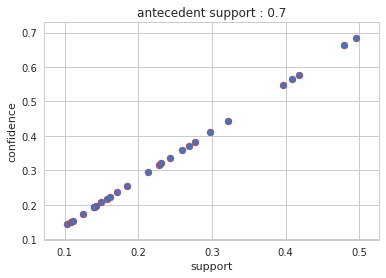

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  support  :  0.5
-------------------------------------
  antecedents consequents  antecedent support  consequent support   support  \
0      (male)      (Dead)            0.647191            0.615730  0.524719   
1      (Dead)      (male)            0.615730            0.647191  0.524719   

   confidence      lift  leverage  conviction  
0    0.810764  1.316752  0.126224    2.030636  
1    0.852190  1.316752  0.126224    2.386905  


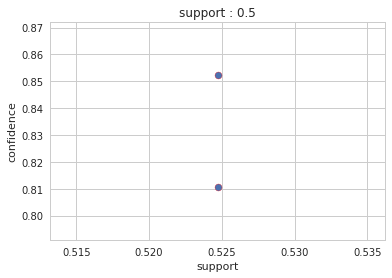

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  confidence  :  0.8
-------------------------------------
               antecedents consequents  antecedent support  \
0              (1, female)  (Survived)            0.105618   
1            (Adult, Dead)         (S)            0.319101   
2                (2, male)      (Dead)            0.121348   
3                (2, Dead)      (male)            0.108989   
4          (Unknown, male)      (Dead)            0.150562   
5          (Unknown, Dead)      (male)            0.142697   
6                (S, male)      (Dead)            0.495506   
7                (S, Dead)      (male)            0.479775   
8                   (male)      (Dead)            0.647191   
9                   (Dead)      (male)            0.615730   
10           (male, Adult)         (S)            0.340449   
11               

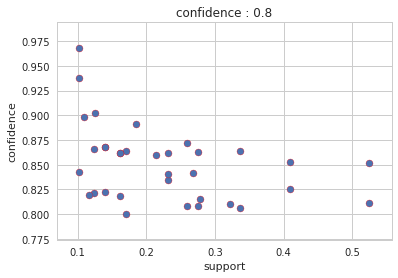

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  conviction  :  3
-------------------------------------
   antecedents consequents  antecedent support  consequent support   support  \
0  (1, female)  (Survived)            0.105618            0.384270  0.102247   
1    (2, Dead)      (male)            0.108989            0.647191  0.102247   

   confidence      lift  leverage  conviction  
0    0.968085  2.519286  0.061661   19.292884  
1    0.938144  1.449563  0.031711    5.703745  


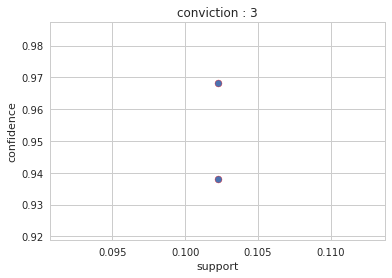

In [111]:
config = [
    ('antecedent support', 0.7),
    ('support', 0.5),
    ('confidence', 0.8),
    ('conviction', 3)
]

for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print 'Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th
        continue
    print rules.columns.values
    print '-------------------------------------'
    print 'Configuration : ', metric_type, ' : ', th
    print '-------------------------------------'
    print (rules)

    support=rules.as_matrix(columns=['support'])
    confidence=rules.as_matrix(columns=['confidence'])

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()

## Interesting Informations: Gender Analysis

- Persons Who are Sex: female       With  PcClass: 1, have 96.80 % Confidence Survived : True
- Persons Who are PcClass: 2        With  Survived: False, have 93.81% Confidence Sex: Male

## Common Information:

- Persons Who are Survived : False  With  Age : UnKnown , have 81.88 %  Confidence  PcClass : 3
- Persons Who are Age : Adult       With  PcClass : 2   , have 90.2 %   Confidence Embarked : S
- Persons Who are Survived: False   With  Age : Adult and PcClass : 3, have 86.36% Confidence Embarked: S

# Title Analysis
---

In [114]:
dataset = []
in_titanic=cat_titanic
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])
# dataset = in_titanic.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print df.head()

       1      2      3  Adult      C  Capt.  Child   Col.   Dead   Don.  \
0  False  False   True   True  False  False  False  False   True  False   
1   True  False  False   True   True  False  False  False  False  False   
2  False  False   True   True  False  False  False  False  False  False   
3   True  False  False   True  False  False  False  False  False  False   
4  False  False   True   True  False  False  False  False   True  False   

    ...       Ms.    Old      Q   Rev.      S   Sir.  Survived   Teen  \
0   ...     False  False  False  False   True  False     False  False   
1   ...     False  False  False  False  False  False      True  False   
2   ...     False  False  False  False   True  False      True  False   
3   ...     False  False  False  False   True  False      True  False   
4   ...     False  False  False  False   True  False     False  False   

   Title_UK  Unknown  
0     False    False  
1     False    False  
2     False    False  
3     False    Fal

## All Nominal values:

In [116]:
print oht.columns_

['1', '2', '3', 'Adult', 'C', 'Capt.', 'Child', 'Col.', 'Dead', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Old', 'Q', 'Rev.', 'S', 'Sir.', 'Survived', 'Teen', 'Title_UK', 'Unknown']


In [117]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)

print output.head()

    support itemsets
0  0.242697      (1)
1  0.206742      (2)
2  0.550562      (3)
3  0.528090  (Adult)
4  0.615730   (Dead)


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  antecedent support  :  0.7
-------------------------------------
   antecedents         consequents  antecedent support  consequent support  \
0          (S)       (Adult, Dead)            0.723596            0.319101   
1          (S)               (Mr.)            0.723596            0.579775   
2          (S)              (Dead)            0.723596            0.615730   
3          (S)             (Adult)            0.723596            0.528090   
4          (S)                 (3)            0.723596            0.550562   
5          (S)         (Mr., Dead)            0.723596            0.488764   
6          (S)        (Mr., Adult)            0.723596            0.328090   
7          (S)      (Mr., 3, Dead)            0.723596            0.316854   
8          (S)           (3, Dead)            0.723

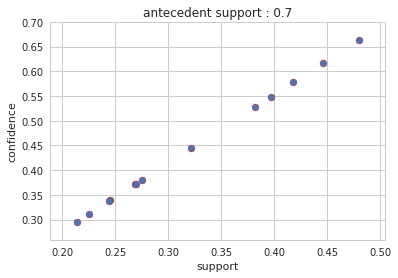

Empty Data Frame For Metric Type :  support  on Threshold :  0.5
['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  confidence  :  0.8
-------------------------------------
           antecedents consequents  antecedent support  consequent support  \
0        (Adult, Dead)         (S)            0.319101            0.723596   
1             (3, Mr.)      (Dead)            0.357303            0.615730   
2             (S, Mr.)      (Dead)            0.446067            0.615730   
3         (Mr., Adult)         (S)            0.328090            0.723596   
4          (S, Mr., 3)      (Dead)            0.275281            0.615730   
5         (Mr., Adult)      (Dead)            0.328090            0.615730   
6        (Adult, Dead)       (Mr.)            0.319101            0.579775   
7               (S, 3)      (Dead)            0.396629            0.6157

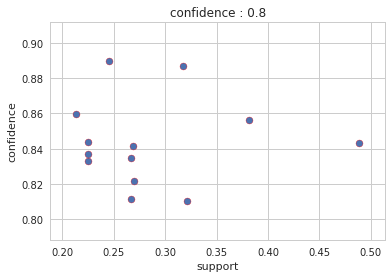

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  conviction  :  3
-------------------------------------
   antecedents consequents  antecedent support  consequent support   support  \
0     (3, Mr.)      (Dead)            0.357303             0.61573  0.316854   
1  (S, Mr., 3)      (Dead)            0.275281             0.61573  0.244944   

   confidence      lift  leverage  conviction  
0    0.886792  1.440229  0.096851    3.394382  
1    0.889796  1.445107  0.075445    3.486891  


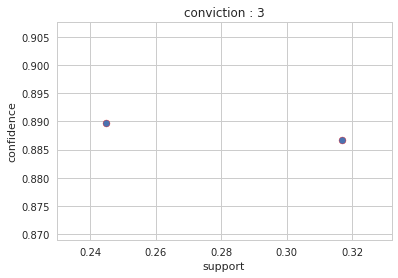

In [118]:
config = [
    ('antecedent support', 0.7),
    ('support', 0.5),
    ('confidence', 0.8),
    ('conviction', 3)
]

for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print 'Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th
        continue
    print rules.columns.values
    print '-------------------------------------'
    print 'Configuration : ', metric_type, ' : ', th
    print '-------------------------------------'
    print (rules)

    support=rules.as_matrix(columns=['support'])
    confidence=rules.as_matrix(columns=['confidence'])

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()

## Simple Filtering Example

In [36]:
rules[rules['confidence']==rules['confidence'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(True),(female),0.38427,0.352809,0.261798,0.681287,1.931035,0.126224,2.030636


In [37]:
rules[rules['confidence']==rules['confidence'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(1, female)",(True),0.105618,0.38427,0.102247,0.968085,2.519286,0.061661,19.292884


In [38]:
rules = association_rules(output, metric='support', min_threshold=0.1)

In [39]:
rules[rules['confidence']==rules['confidence'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
274,(S),"(True, Adult, female)",0.723596,0.14382,0.103371,0.142857,0.993304,-0.000697,0.998876


In [40]:
rules[rules['confidence']==rules['confidence'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,"(1, female)",(True),0.105618,0.38427,0.102247,0.968085,2.519286,0.061661,19.292884
